<a href="https://colab.research.google.com/github/Rgvk1/my-projects/blob/main/Final_CRM_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

# **Dataset Description:**


The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.

Variable Description
1.	InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
2.	StockCode: Product code that consists 5 digits.
3.	Description: Product name.
4.	Quantity: The quantities of each product per transaction.
5.	InvoiceDate: This represents the day and time when each transaction was generated.
6.	UnitPrice: Product price per unit.
7.	CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
8.	Country: Name of the country where each customer resides.

Note:
●	A negative quantity in this data set represents a "return transaction" instead of a "purchase transaction".
●	Transactions where the unit price is zero potentially indicate a free item.


# **1.Data Upload and preprocessing**

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
!gdown 1Jd9yNrvAa0zP7HwmEMqM2YMxBsAMP9d9

Downloading...
From: https://drive.google.com/uc?id=1Jd9yNrvAa0zP7HwmEMqM2YMxBsAMP9d9
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 64.6MB/s]


In [4]:
df=pd.read_csv('Ecom_CRM_analysis.csv',encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

Inference: There are 541909 rows and 8 attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Checking for missing values
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


**Inference:** We notice there are 1454 missing values for Description and 135080 values missing for CustomerID.


*   We shall check the missing description referring to StockCode and replace with description from other items having same StockCode.
*   For CustomerID we shall check the InvoiceDate to see timestamp and understand if they are the same customer and fill with values of Unknown Customer1,2 etc.



In [10]:
# Check values for missing description.
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df[df['Description'].isna()]['StockCode'].nunique()

960

In [12]:
#Function to find Description based on StockCode
def Description(inp):
  try:
    return df[df['StockCode']==inp]['Description'].mode()[0]
  except:
    return  "Unknown Descrption"


In [13]:
#Replacing Description from other items by checking common StockCode
df.loc[df['Description'].isna(),'Description']=df.loc[df['Description'].isna(),'StockCode'].apply(Description)

In [14]:
#Thus we have replaced all null values for Description
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [15]:
df[df['Description']=='Unknown Descrption']['UnitPrice'].value_counts()
#Note: All items with Unknown Description are having unit price as 0 so they may be Free items


,count
UnitPrice,
0.0,112


In [16]:
#We can replace the Description as 'Free Item'.Here we have kept as Unknown Description only
#df.loc[df['Description']=='Unknown Descrption','Description']='Free Item'

In [17]:
#Imputing CustomerID
df[df['CustomerID'].isna()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [18]:
  #Unique timestamp of the values having CustomerID as Nan
  TimeStamp=df[df['CustomerID'].isna()]['InvoiceDate'].unique()

In [19]:
# For each unique Timestamp we shall replace Customer ID with Unknown Customer1,Unknown Customer2 etc
df['CustomerID'] = df['CustomerID'].astype(str)
for i in TimeStamp:
  df.loc[df['InvoiceDate']==i,'CustomerID']='Unknown Customer'+str(TimeStamp.tolist().index(i)+1)

In [20]:
#Filter customer ID with Unknown Customer

df[df['CustomerID'].str.startswith("Unknown")]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,Unknown Customer1,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,Unknown Customer2,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,Unknown Customer2,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,Unknown Customer2,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,Unknown Customer2,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,Unknown Customer3161,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,Unknown Customer3161,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,Unknown Customer3161,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,Unknown Customer3161,United Kingdom


In [21]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


**Inference:** Thus we have handled all missing values.

In [22]:
df.duplicated().sum()

5268

**Inference:** There are 5268 duplicate values

In [23]:
# We shall remove the duplicates.
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(536641, 8)

**Inference:** Thus we have finished processing the data. The data is now ready for EDA analysis.

### **Univariate Analysis:**

In [26]:
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Number of unique values :", df[col_name].nunique())
  print("Value counts : ")
  print(df[col_name].value_counts())

In [27]:
col_list = ['StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']
for col in col_list:
  print(col, " -")
  dist_check(df, col)
  print("\n")

StockCode  -
Unique values :  ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Number of unique values : 4070
Value counts : 
StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: count, Length: 4070, dtype: int64


Description  -
Unique values :  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Number of unique values : 4224
Value counts : 
Description
WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
                                      ... 
OOPS ! adjustment                        1
found box                                1
thrown away-can't sell.                

**Inference:**

•	There are 4070 unique Stock Codes/Products at the store that are bought by customers.

•	Some of the top selling products are White Hanging Tea Light Holder,Regency Tea stand 3 tier and Jumbo Bag Red Retrospot.

•	The Unit price of products vary from a maximum of 4505 and minimum of 0.001.The higher charges are for Postage values.The most popular products are in the range 1.25-1.65

•	There are 7521 customers that are being studied.

•	The majority of customers are from United Kingdom, then Germany and France.

•	The dataset encompasses transactions from 01/12/2010 to 09/12/2011


**Feature Engineering**

We shall add a New Feature called Transaction Type to identify where the transaction taken place is a Purchase or Return. Also we shall indicate whether the item is a free item or not.
*   Items with negative quantity are either cancelled transactions or returned items.
*   The items with Unit Price =0 as Free items.



In [28]:

df.loc[(df['Quantity']<0) & (df['UnitPrice']>0) , 'Transaction_type'] = 'Returned'
df.loc[(df['Quantity']<0) & (df['UnitPrice']==0) , 'Transaction_type'] = 'Returned Free Item'
df.loc[(df['Quantity']>0) & (df['UnitPrice']>0), 'Transaction_type'] = 'Purchased'
df.loc[(df['Quantity']>0) & (df['UnitPrice']==0), 'Transaction_type'] = 'Purchased-Free Item'
df.loc[df['UnitPrice']<0, 'Transaction_type'] = 'Adjust bad Debt'


In [29]:
df['Transaction_type'].value_counts()

,count
Transaction_type,
Purchased,524878
Returned,9251
Returned Free Item,1336
Purchased-Free Item,1174
Adjust bad Debt,2


Inference:



*  Here we can see that out of the total transactions 536641, there are 9251 Returns and 1336 Free items returned.
*   There are 524878 Purchases and 1174 Free items given during purchase or could also indicate discount



**Note:For Our Analysis, shall consider the Purchased items and Returns together so that we can get the total amount that the company gains.**

In [30]:
#We can add new features to show year,month of purchase. Also time of day.
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Time']=df['InvoiceDate'].dt.time

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_type,Year,Month,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00


In [32]:
def time_of_day(x):
  if x>=4 and x<12:
    return 'Morning'
  elif x>=12 and x<16:
    return 'Afternoon'
  elif x>=16 and x<19:
    return 'Evening'
  else:
    return 'Night'

In [33]:
#We can also add a feature to show parts of day
df['Part_of_day']=df['InvoiceDate'].dt.hour
df['Part_of_day']=df['Part_of_day'].apply(time_of_day)


In [34]:
#Let's add a feature for Price to show Low,Medium or High Priced items
df['Price_range']=pd.cut(df['UnitPrice'],[-12000,0,5000,15000,39000],labels=['Free Item','Low','Medium','High'])

In [35]:
df[df['Transaction_type']=='Purchased'].groupby('Price_range')['InvoiceNo'].count()

<ipython-input-35-411da5c044a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Transaction_type']=='Purchased'].groupby('Price_range')['InvoiceNo'].count()


,InvoiceNo
Price_range,
Free Item,0
Low,524875
Medium,3
High,0


In [36]:
#Adding a new feature Revenue
df['Revenue']=df['Quantity']* df['UnitPrice']

In [37]:
df[df['Transaction_type']=='Purchased'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

,Revenue
Country,
United Kingdom,9001744.094
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370
Australia,138453.810
Spain,61558.560
Switzerland,57067.600
Belgium,41196.340


**Inference:**


*   The major share of revenue is from United Kingdom and then Netherlands.




In [38]:

df[df['CustomerID'].str.startswith("Unknown")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_type,Year,Month,Time,Part_of_day,Price_range,Revenue
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,Unknown Customer1,United Kingdom,Purchased-Free Item,2010,12,11:52:00,Morning,Free Item,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,Unknown Customer2,United Kingdom,Purchased,2010,12,14:32:00,Afternoon,Low,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,Unknown Customer2,United Kingdom,Purchased,2010,12,14:32:00,Afternoon,Low,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,Unknown Customer2,United Kingdom,Purchased,2010,12,14:32:00,Afternoon,Low,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,Unknown Customer2,United Kingdom,Purchased,2010,12,14:32:00,Afternoon,Low,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,Unknown Customer3161,United Kingdom,Purchased,2011,12,10:26:00,Morning,Low,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,Unknown Customer3161,United Kingdom,Purchased,2011,12,10:26:00,Morning,Low,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,Unknown Customer3161,United Kingdom,Purchased,2011,12,10:26:00,Morning,Low,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,Unknown Customer3161,United Kingdom,Purchased,2011,12,10:26:00,Morning,Low,10.79


In [39]:
#Outlier Detection Using Revenue
Q1=np.percentile(df['Revenue'],25)
Q3=np.percentile(df['Revenue'],75)
IQR=Q3-Q1

In [40]:
upper_limit=Q3+(1.5*IQR)
upper_limit

37.875

In [41]:
lower_limit=Q1-(1.5*IQR)
lower_limit

-16.724999999999998

In [42]:
df_upper_outliers=df[df['Revenue']>upper_limit]
df_lower_outliers=df[df['Revenue']<lower_limit]

In [43]:
upper_count=len(df_upper_outliers)
lower_count=len(df_lower_outliers)

In [44]:
print(f'Upper Outliers Count: {upper_count}')
print(f'Lower Outliers Count: {lower_count}')

Upper Outliers Count: 43083
Lower Outliers Count: 2543


<Axes: ylabel='Revenue'>

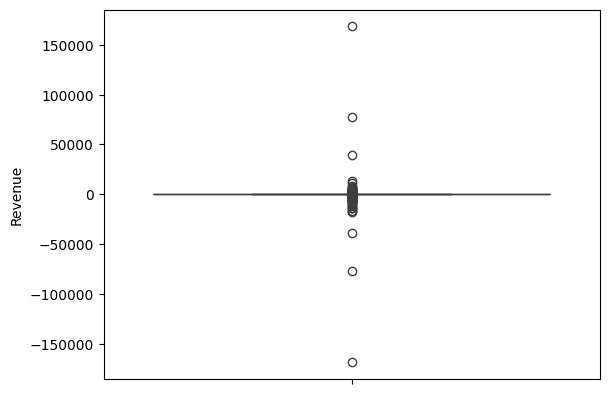

In [45]:
sns.boxplot(data=df,y='Revenue')

Inference:



*   The outliers are plotted as seen in graph.
*   The upper limit is 37.8 and lower limit is -16.72

Here since a lot of valuable data lies in the outliers we are not removing the outliers.



# **RFM Segmentation :**

We can use different scales based on the size of your customer base. For example, you can use a 1–3 scale for up to 30,000 customers, a 1–4 scale for 30,000 to 200,000 customers, and a 1–5 scale for over 200,000 customers.


*   Here since we have more 200,000 customers we shall use 1-5 scale.

*   For this we have to take 20 percentiles and split the customers based on their recency value,frequency and monetary value.







In [46]:
#Recency Calculation:
#First calculate recency Value:
df['Recency_value']=df['InvoiceDate'].max()-df['InvoiceDate']
df['Recency_value']=df['Recency_value'].dt.days

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_type,Year,Month,Time,Part_of_day,Price_range,Revenue,Recency_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Purchased,2010,12,08:26:00,Morning,Low,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00,Morning,Low,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Purchased,2010,12,08:26:00,Morning,Low,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00,Morning,Low,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Purchased,2010,12,08:26:00,Morning,Low,20.34,373


In [48]:
df_recency=df.groupby('CustomerID')['Recency_value'].min().sort_values(ascending=False)
df_recency=pd.DataFrame(df_recency)
df_recency.reset_index(inplace=True)
df_recency.head()


,CustomerID,Recency_value
0,16583.0,373
1,17968.0,373
2,18074.0,373
3,12791.0,373
4,16250.0,373


In [49]:
#Recency Score
# we need to find the Recency by dividing the minimum recency value all customers to 5 parts by finding 20,40,60,80 percentile and assigning rfm in the 1-5 scale with higher recency having lower value that is highest range will have score as 1.
First=np.percentile(df_recency['Recency_value'],20)
Second=np.percentile(df_recency['Recency_value'],40)
Third=np.percentile(df_recency['Recency_value'],60)
Fourth=np.percentile(df_recency['Recency_value'],80)
minm=df_recency['Recency_value'].min()
maxm=df_recency['Recency_value'].max()
print(First, Second,Third,Fourth,minm,maxm)

20.0 58.0 140.0 247.0 0 373


In [50]:
#Customers with lower Recency value get the higher score of 5 and higher recency value have score 1.
df_recency['Recency_score']=pd.cut(df_recency['Recency_value'],[-1,First,Second,Third,Fourth,400],labels=[5,4,3,2,1])

In [51]:
df_recency.head()

,CustomerID,Recency_value,Recency_score
0,16583.0,373,1
1,17968.0,373,1
2,18074.0,373,1
3,12791.0,373,1
4,16250.0,373,1


In [52]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Transaction_type,0
Year,0


In [53]:
#Frequency
#For calculating frequency we need to count the unique number of invoices for each customer id
df_freq=df[df['Transaction_type']=='Purchased'].groupby('CustomerID')['InvoiceNo'].nunique()
df_freq=pd.DataFrame(df_freq)
df_freq.reset_index(inplace=True)
df_freq.head()


,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [54]:
# Rename the InvoiceNo field as Frequency
df_freq.rename(columns={'InvoiceNo':'Frequency'},inplace=True)
df_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [55]:
#Frequency Score
# we need to find the Frequency score by dividing the frequency value all customers to 5 parts by finding ,here have taken 20,50,70,90 percentile and assigning rfm in the 1-5 scale with higher frequency having higher value that is highest range will have score as 5.
First_f=np.percentile(df_freq['Frequency'],20)
Second_f=np.percentile(df_freq['Frequency'],50)
Third_f=np.percentile(df_freq['Frequency'],70)
Fourth_f=np.percentile(df_freq['Frequency'],90)
minm_f=df_freq['Frequency'].min()
maxm_f=df_freq['Frequency'].max()
print(First_f, Second_f,Third_f,Fourth_f,minm_f,maxm_f)


1.0 2.0 3.0 7.0 1 206


In [56]:
df_freq['Frequency_score']=pd.cut(df_freq['Frequency'],[0,First_f,Second_f,Third_f,Fourth_f,300],labels=[1,2,3,4,5])

<Axes: >

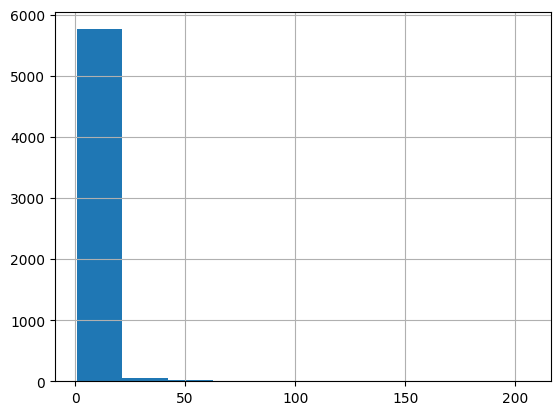

In [57]:
df_freq['Frequency'].hist()

In [58]:
df_freq['Frequency'].value_counts().sum()

5839

In [59]:
df_freq.head()

,CustomerID,Frequency,Frequency_score
0,12346.0,1,1
1,12347.0,7,4
2,12348.0,4,4
3,12349.0,1,1
4,12350.0,1,1


In [60]:
#Monetary
# In order to calculate the monetory value we need to calculate total revenue generated from each customer
df_monetary=df.groupby('CustomerID')['Revenue'].sum()
df_monetary=pd.DataFrame(df_monetary)
df_monetary.reset_index(inplace=True)
df_monetary.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [61]:
#Monetary Score calculate by finding 20,40,60,80 percentile and assigning rfm in the 1-5 scale with higher monetary value having higher value that is highest range will have score as 5.
First_m=np.percentile(df_monetary['Revenue'],20)
Second_m=np.percentile(df_monetary['Revenue'],40)
Third_m=np.percentile(df_monetary['Revenue'],60)
Fourth_m=np.percentile(df_monetary['Revenue'],80)
maxm_m=df_monetary['Revenue'].max()
minm_m=df_monetary['Revenue'].min()
print(First_m, Second_m,Third_m,Fourth_m,minm_m,maxm_m)


0.0 205.48 591.75 1556.84 -17836.46 276277.32


In [62]:
df_monetary['Monetary_score']=pd.cut(df_monetary['Revenue'],[-18000,First_m,Second_m,Third_m,Fourth_m,300000],labels=[1,2,3,4,5])

In [63]:
df_monetary.head()

,CustomerID,Revenue,Monetary_score
0,12346.0,0.00,1
1,12347.0,4310.00,5
2,12348.0,1797.24,5
3,12349.0,1757.55,5
4,12350.0,334.40,3


In [64]:
df[df['CustomerID'].isin(df_monetary[df_monetary['Revenue']>200000]['CustomerID'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_type,Year,Month,Time,Part_of_day,Price_range,Revenue,Recency_value
16425,537657,82484,WOOD BLACK BOARD ANT WHITE FINISH,408,2010-12-07 16:42:00,4.78,18102.0,United Kingdom,Purchased,2010,12,16:42:00,Evening,Low,1950.24,366
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,2010-12-07 16:42:00,19.84,18102.0,United Kingdom,Purchased,2010,12,16:42:00,Evening,Low,595.20,366
16427,537657,22189,CREAM HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,Purchased,2010,12,16:42:00,Evening,Low,2245.32,366
16428,537657,22188,BLACK HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,Purchased,2010,12,16:42:00,Evening,Low,2245.32,366
16429,537657,21623,VINTAGE UNION JACK MEMOBOARD,408,2010-12-07 16:42:00,6.38,18102.0,United Kingdom,Purchased,2010,12,16:42:00,Evening,Low,2603.04,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540066,581457,23535,WALL ART BICYCLE SAFETY,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,Purchased,2011,12,18:43:00,Evening,Low,491.40,0
540067,581457,23530,WALL ART ONLY ONE PERSON,126,2011-12-08 18:43:00,3.57,18102.0,United Kingdom,Purchased,2011,12,18:43:00,Evening,Low,449.82,0
540068,581457,23526,WALL ART DOG LICENCE,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,Purchased,2011,12,18:43:00,Evening,Low,491.40,0
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,Purchased,2011,12,18:43:00,Evening,Low,522.90,0


In [65]:
#Now lets combine df_rfm,df_freq,df_monetary to make a single table to find the RFM score
df_rfm=df_recency.merge(df_freq,on='CustomerID')


In [66]:
df_rfm=df_rfm.merge(df_monetary,on='CustomerID')

In [67]:
df_rfm.head()

,CustomerID,Recency_value,Recency_score,Frequency,Frequency_score,Revenue,Monetary_score
0,16583.0,373,1,1,1,233.45,3
1,17968.0,373,1,1,1,265.10,3
2,18074.0,373,1,1,1,489.60,3
3,12791.0,373,1,1,1,192.60,2
4,16250.0,373,1,1,1,226.14,3


In [68]:
#Now we shall concat 3 scores of recency,frequency and monetary to make the rfm score
df_rfm['RFM_score']=df_rfm['Recency_score'].astype(str)+df_rfm['Frequency_score'].astype(str)+df_rfm['Monetary_score'].astype(str)

In [69]:
df_rfm.head()

,CustomerID,Recency_value,Recency_score,Frequency,Frequency_score,Revenue,Monetary_score,RFM_score
0,16583.0,373,1,1,1,233.45,3,113
1,17968.0,373,1,1,1,265.10,3,113
2,18074.0,373,1,1,1,489.60,3,113
3,12791.0,373,1,1,1,192.60,2,112
4,16250.0,373,1,1,1,226.14,3,113


## **Customer Segmentation Using RFM**

In [70]:
#Create a function based on the segments as shown above to assign the segment name based on score.
def segment_name(score):
  if score in ('555','554','544','545','445','455','454'):
    return 'Champions'
  elif score in ('543','444','435','355','345','354','335','344'):
    return 'Loyal'
  elif score in ('553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','351','352','342','341','333','323'):
    return 'Potential Loyalist'
  elif score in ('512','511','422','421','412','411','311'):
    return 'New Customers'
  elif score in ('525','523','524','522','521','515','514','513','425','424','413','414','415','315','314','313'):
    return 'Promising'
  elif score in ('535','534','434','443','343','334','325','324'):
    return 'Need Attention'
  elif score in ('331','321','312','221','213','231','241','251'):
    return 'About to Sleep'
  elif score in ('332','322','222','223','233','232','132','123','122','212','211'):
    return 'Hibernating Customers'
  elif score in ('155','144','154','214','215','115','114','113'):
    return 'Cannot Lose them but losing'
  elif score in ('255','254','244','245','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124'):
    return 'At Risk'
  elif score in ('111','112','121','131','141','151'):
    return 'Lost Customers'


In [71]:
df_rfm['Customer_Segment']=df_rfm['RFM_score'].apply(segment_name)

In [72]:
df_rfm.head()

,CustomerID,Recency_value,Recency_score,Frequency,Frequency_score,Revenue,Monetary_score,RFM_score,Customer_Segment
0,16583.0,373,1,1,1,233.45,3,113,Cannot Lose them but losing
1,17968.0,373,1,1,1,265.10,3,113,Cannot Lose them but losing
2,18074.0,373,1,1,1,489.60,3,113,Cannot Lose them but losing
3,12791.0,373,1,1,1,192.60,2,112,Lost Customers
4,16250.0,373,1,1,1,226.14,3,113,Cannot Lose them but losing


In [73]:
df_rfm.groupby('Customer_Segment')['CustomerID'].count()

,CustomerID
Customer_Segment,
About to Sleep,386
At Risk,284
Cannot Lose them but losing,653
Champions,1049
Hibernating Customers,534
Lost Customers,411
Loyal,376
Need Attention,405
New Customers,318


Inference:
RFM analysis can help you create personalized marketing strategies that target specific customer types with messages and offers that are more likely to be relevant

*   There 1049 Champions who are our best customers. Then we have 376 Loyal customers. These customers can be rewarded with exclusive benefits. Also we can start a loyalty program for them by adding reward points that can be redeemed. Then ensures customer retention.
*   There are 405 Customers that Need Attention,534 Hibernating Cutomers ,386 about to Sleep and 284 at Risk customers,we offer discounts to them since they haven't been in contact with you for a while.


*   There 653 customers that we are losing but cannot lose, we can offer them reward points or make discounts to ensure they don't leave. We can give them personalized offers to ensure that they are not lost.Like looking at the best product bundle we could offer free items in case of purchase of one of the combo item.




# **Key Metrics**

In [74]:
# Average Order Value:
df[df['Transaction_type']=='Purchased'].groupby('InvoiceNo')['Revenue'].sum().mean()

533.1718839679359

In [75]:
# Year wise total revenue
df.groupby('Year')['Revenue'].sum()

,Revenue
Year,
2010,746723.610
2011,8979283.344


# **Inventory Analysis:**

In [76]:
#Number of products
df['Description'].nunique()

4224

In [111]:
df_rev=df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
df_rev=pd.DataFrame(df_rev)
df_rev.reset_index(inplace=True)
df_rev.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,Revenue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164459.49
2,WHITE HANGING HEART T-LIGHT HOLDER,99612.42
3,PARTY BUNTING,98243.88
4,JUMBO BAG RED RETROSPOT,92175.79


In [115]:
#lets add a coloumn to find the cumulative percentage of total revenue it contributes
df_rev['Cumulative_Percentage']=df_rev['Revenue'].cumsum()/df_rev['Revenue'].sum()*100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
df_rev[df_rev['Cumulative_Percentage']<=80]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,Revenue,Revenue_percent,Cumulative_Percentage
0,DOTCOM POSTAGE,206245.48,0.021206,2.120557
1,REGENCY CAKESTAND 3 TIER,164459.49,0.016909,3.811482
2,WHITE HANGING HEART T-LIGHT HOLDER,99612.42,0.010242,4.835668
3,PARTY BUNTING,98243.88,0.010101,5.845783
4,JUMBO BAG RED RETROSPOT,92175.79,0.009477,6.793508
...,...,...,...,...
752,20 DOLLY PEGS RETROSPOT,3218.90,0.000331,79.839774
753,MIRRORED DISCO BALL,3218.15,0.000331,79.872862
754,JAM JAR WITH PINK LID,3215.99,0.000331,79.905928
755,POPPY'S PLAYHOUSE LIVINGROOM,3211.34,0.000330,79.938946


**Inference:** By looking at the cumulative percentage of revenue that a product contributes we can see that 756 products contributes to 80% of sales. So company can focus on these products and reduce its product number from 4224 to a much better number around 700.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Description'>

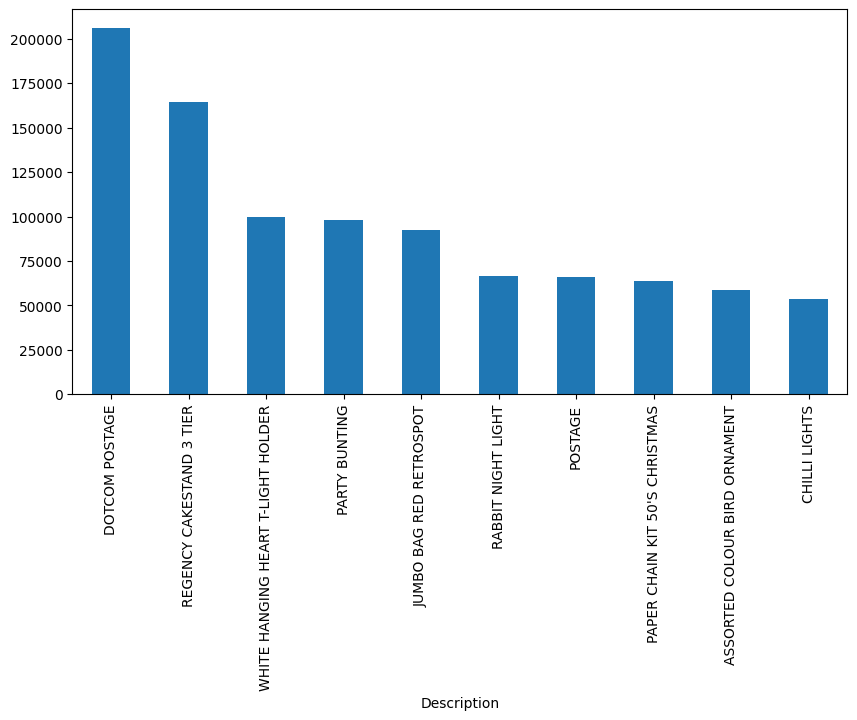

In [108]:
#Plotting the products with most sales
plt.figure(figsize=(10,5))
df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [78]:
#Popular Products-Top 10 products
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30963
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


**Inference:** The most top 3 popular product by number sold are World War 2 Gliders Asstd Designs,Jumbo Bag Red Retrospot,Popcorn Holder.

<Axes: xlabel='Description'>

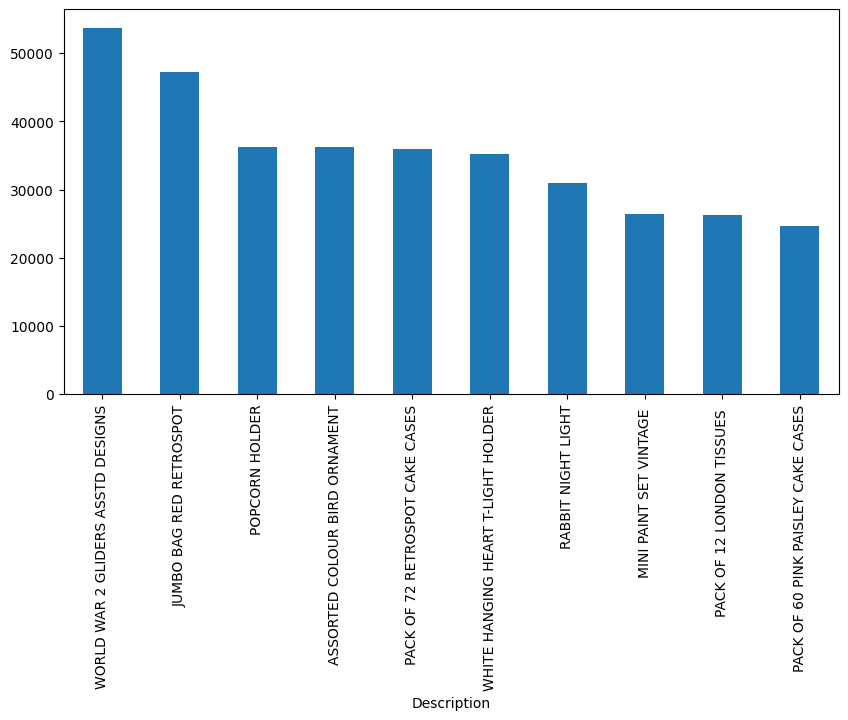

In [79]:
#Lets plot the top 10 products in a graph
plt.figure(figsize=(10,5))
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [80]:

#Seasonality of Inventory
#We need to find which products are sold most in which months
df.groupby(['Month','Description'])['Quantity'].sum().sort_values(ascending=False).head(20)


Month  Description                       
11     RABBIT NIGHT LIGHT                    14842
       ASSTD DESIGN 3D PAPER STICKERS        12551
       POPCORN HOLDER                        12151
4      WORLD WAR 2 GLIDERS ASSTD DESIGNS     10143
10     WORLD WAR 2 GLIDERS ASSTD DESIGNS      8084
11     PAPER CHAIN KIT 50'S CHRISTMAS         7858
5      SMALL POPCORN HOLDER                   6840
12     WORLD WAR 2 GLIDERS ASSTD DESIGNS      6562
8      ASSORTED COLOUR BIRD ORNAMENT          6544
10     RABBIT NIGHT LIGHT                     6344
12     POPCORN HOLDER                         6198
10     POPCORN HOLDER                         5861
11     JUMBO BAG RED RETROSPOT                5806
1      ICON MUG REVOLUTIONARY                 5568
       WHITE HANGING HEART T-LIGHT HOLDER     5524
11     WOODEN STAR CHRISTMAS SCANDINAVIAN     5364
8      POPCORN HOLDER                         5316
       JUMBO BAG RED RETROSPOT                5301
3      JUMBO BAG RED RETROSPOT                5281
11     ASSORTED COLOUR BIRD ORNAMENT          5219
Name: Quantity, dtype: int64

Inference: We can see that there is peak of sales in November with the highest selling products Rabbit Night Light, Asst Design 3D paper Sticker and Popcorn Holder.

<Axes: xlabel='Month'>

<Figure size 1000x500 with 0 Axes>

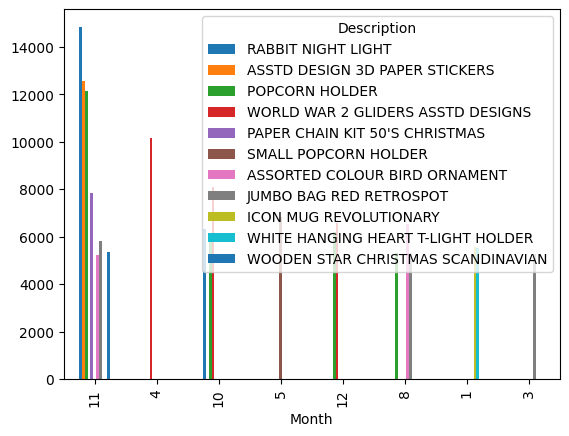

In [81]:
# Lets plot the demand of products based on months
plt.figure(figsize=(10,5))
df.groupby(['Month','Description'])['Quantity'].sum().sort_values(ascending=False).head(20).unstack().plot(kind='bar')

# **Sale Analysis:**

In [82]:
# Month wise Sale
df.groupby('Month')['Revenue'].sum()

,Revenue
Month,
1,558448.560
2,497026.410
3,682013.980
4,492367.841
5,722094.100
6,689977.230
7,680156.991
8,681386.460
9,1017596.682


<Axes: xlabel='Month'>

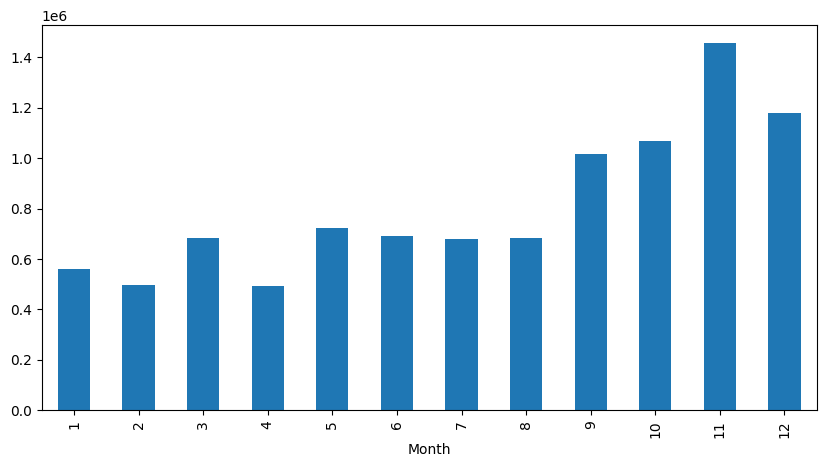

In [83]:
#Plot the month wise revenue
plt.figure(figsize=(10,5))
df.groupby('Month')['Revenue'].sum().plot(kind='bar')

**Inference:** The maximum Sale occurs in the November followed by December. Probably due to the Christmas, New Year season.

In [84]:
#Number of orders per month
df[df['Transaction_type']=='Purchased'].groupby(['Year','Month'])['InvoiceNo'].nunique()

Year  Month
2010  12       1559
2011  1        1086
      2        1100
      3        1454
      4        1246
      5        1681
      6        1533
      7        1475
      8        1361
      9        1837
      10       2040
      11       2769
      12        819
Name: InvoiceNo, dtype: int64

In [85]:
#Total Number of Customers
df['CustomerID'].nunique()


7521

**Inference:** There are about 7521 unique customers that is being analyzed in the data.

In [86]:
df['Transaction_type'].value_counts()

,count
Transaction_type,
Purchased,524878
Returned,9251
Returned Free Item,1336
Purchased-Free Item,1174
Adjust bad Debt,2


In [87]:
#Average days between purchases
df.head()
df_date=df.groupby(['CustomerID','InvoiceNo'])['InvoiceDate'].mean()
df_date=df_date.reset_index()
df_date.head()

,CustomerID,InvoiceNo,InvoiceDate
0,12346.0,541431,2011-01-18 10:01:00.000000000
1,12346.0,C541433,2011-01-18 10:17:00.000000000
2,12347.0,537626,2010-12-07 14:57:00.000000000
3,12347.0,542237,2011-01-26 14:29:59.999999744
4,12347.0,549222,2011-04-07 10:43:00.000000000


In [88]:
df_date['previous_visit'] = df_date.groupby(['CustomerID'])['InvoiceDate'].shift()

In [89]:
df_date.head()

,CustomerID,InvoiceNo,InvoiceDate,previous_visit
0,12346.0,541431,2011-01-18 10:01:00.000000000,NaT
1,12346.0,C541433,2011-01-18 10:17:00.000000000,2011-01-18 10:01:00.000000000
2,12347.0,537626,2010-12-07 14:57:00.000000000,NaT
3,12347.0,542237,2011-01-26 14:29:59.999999744,2010-12-07 14:57:00.000000000
4,12347.0,549222,2011-04-07 10:43:00.000000000,2011-01-26 14:29:59.999999744


In [90]:
df_date['days_bw_visits'] = df_date['InvoiceDate'] - df_date['previous_visit']

In [91]:
df_date['days_bw_visits'] = df_date['days_bw_visits'].apply(lambda x: x.days)

In [92]:
#Average Days between Purchase for each customer
df_date.groupby('CustomerID')['days_bw_visits'].mean()

,days_bw_visits
CustomerID,
12346.0,0.000000
12347.0,60.333333
12348.0,94.000000
12349.0,NaN
12350.0,NaN
...,...
Unknown Customer995,0.000000
Unknown Customer996,0.000000
Unknown Customer997,NaN


Inference: From the above we can see the Average days between purchase for each customer for some it maybe 2 months for others less than that.

*   This will help in our marketing efforts , if the customer doesnt make a purchase within the average duration we can send them targeted email with offer or discount.




In [93]:
#Overall Average number of days between purchases for all customers
df_date['days_bw_visits'].mean()

24.621357111787734

Inference: On the whole the average number of days between purchase is 24 days or about a month. So monthly marketing campaigns can be made to keep customers engaged or remind of the brand. With more focus on November where maximum sale occurs.

In [94]:
#Preferred Shopping Days
#Add the day of week
df['Day']=df['InvoiceDate'].dt.day_name()


In [95]:
df.groupby('Day')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Day,
Thursday,2108701.530
Tuesday,1965703.611
Wednesday,1730088.430
Monday,1584895.301
Friday,1537958.621
Sunday,798659.461


<Axes: xlabel='Day'>

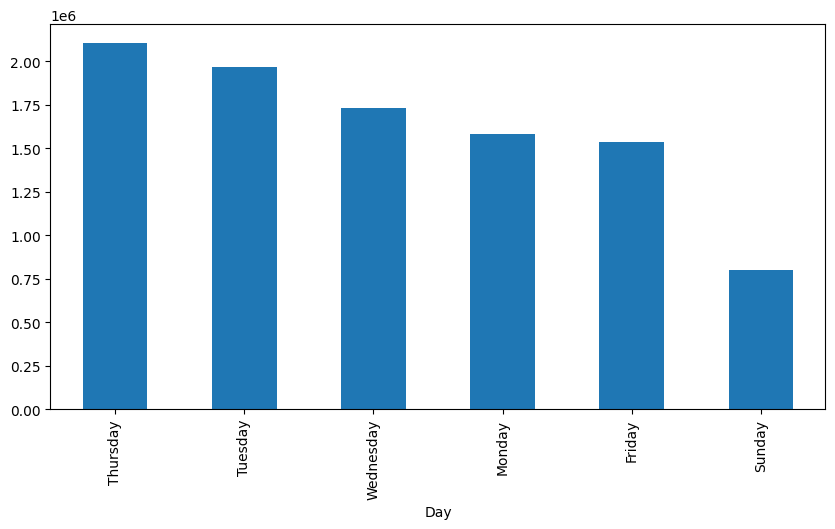

In [96]:
#Plot the day wise Revenue
plt.figure(figsize=(10,5))
df.groupby('Day')['Revenue'].sum().sort_values(ascending=False).plot(kind='bar')

**Inference: **Since Thursday has maximum sale, we can keep weekly offer days on Thursday to boost sales.

Inference: Maximum sales has happened on Thursday, hence we conclude that preferred shopping day is Thursday

In [97]:
#Peak shopping Hour
#Add the hour of the day
df['Hour']=df['InvoiceDate'].dt.hour
df.groupby('Hour')['Revenue'].sum().sort_values(ascending=False)


,Revenue
Hour,
12,1357595.120
10,1327329.891
15,1186819.410
13,1172985.870
11,1146457.490
14,1091408.741
9,766524.171
16,727666.670
17,434834.541


<Axes: xlabel='Hour'>

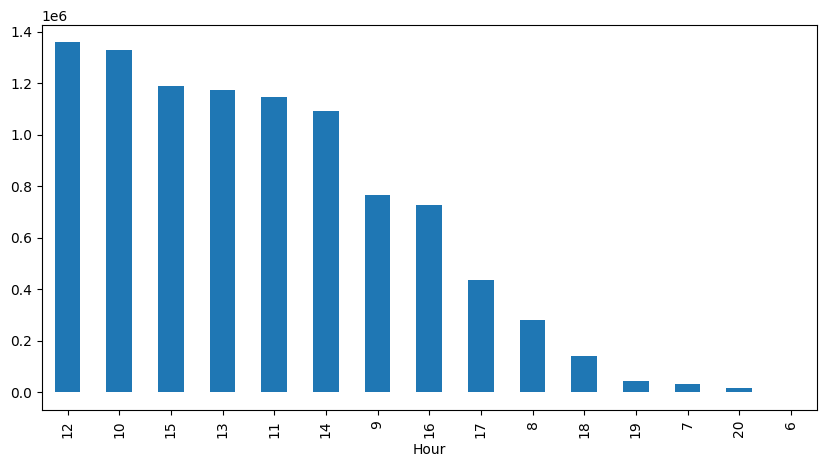

In [98]:
#Plot hourly sales data
plt.figure(figsize=(10,5))
df.groupby('Hour')['Revenue'].sum().sort_values(ascending=False).plot(kind='bar')

Inference: We can see peak shopping hour is 12pm in the noon where maximum sales has occured.

# **Market Basket Analysis:**

In [99]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [100]:
#some spaces are there in description need to remove else later operation it will create problem..
df['Description'] = df['Description'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
#Since some transactions are Returns or Free items we shall remove and take only the data for purchased
df_basket= df[df['Transaction_type']=='Purchased']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
#convert data in format which it require fill 0 if any nan values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# Transactions done in France
basket_France = (df_basket[df_basket['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# Hot encoding the Data

# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-104-64ece084c0d7>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket_France.applymap(hot_encode)


**#Building the models and analyzing the results**

**1.France**





In [105]:
# Building the model
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [106]:
frq_items.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.068878,(ASSORTED COLOUR MINI CASES)
5,0.081633,(BAKING SET 9 PIECE RETROSPOT)
6,0.051020,(BLUE HARMONICA IN BOX)
7,0.068878,(CHARLOTTE BAG APPLES DESIGN)
8,0.066327,(CHARLOTTE BAG DOLLY GIRL DESIGN)
9,0.058673,(CHARLOTTE BAG PINK POLKADOT)


In [107]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents  \
44                        (JUMBO BAG WOODLAND ANIMALS)   
259  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
270  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
44                         (POSTAGE)            0.076531            0.765306   
259                        (POSTAGE)            0.051020            0.765306   
270                        (POSTAGE)            0.053571            0.765306   
302  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  zhangs_metric  
44   0.076531       1.000  1.306667  0.017961         inf       0.254144  
259  0.051020       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Inference:**
From the above output, it can be seen that paper cups and paper and plates are bought together in France. This is because the French have a culture of having a get-together with their friends and family atleast once a week.

Inference: From similar Analysis we can find the most sold combination of products and provide bundled offers to encourage higher purchases.

# **Recommendations:**


*Personalized Email marketing

•	By looking at the cumulative percentage of revenue that a product contributes we can see that 756 products contributes to 80% of sales. So company can focus on these products and reduce its product number from 4224 to a much better number around 700.

•	Company can do campaign weekly on Thursday around noon providing offers to attract customers.

•	The major yearly promotions or marketing efforts should be focused close to November as it the holiday season where maximum yearly sale occurs.

•	Every month company can be send promotional mails as average time between purchases is 25 days.Also for customers who are about to churn they can send offers based on their purchase duration.

•	Champions and Loyal Customers:These customers can be rewarded with exclusive benefits. Also we can start a loyalty program for them by adding reward points that can be redeemed. Then ensures customer retention.

•	Customers that Need Attention, Hibernating Cutomers , about to Sleep ,At Risk customers:We offer discounts to them since they haven't been in contact with you for a while.

•	We are losing but cannot lose: We can offer them reward points or make discounts to ensure they don't leave. We can give them personalized offers to ensure that they are not lost.Like looking at the best product bundle we could offer free items in case of purchase of one of the combo item.

•	Based on basket analysis the company can do bundled offers like for example paper cup and plate in France.




